In [1]:
import csv

import pandas as pd

mmlu_num_maj_df = pd.read_csv(
    "../data/mmlu_final.tsv",
    sep="\t",
    header=0,
    quoting=csv.QUOTE_NONE,
    quotechar="",
    escapechar="\\",
)


STEM = ["math", "physics", "chemistry", "engineering", "computer science"]

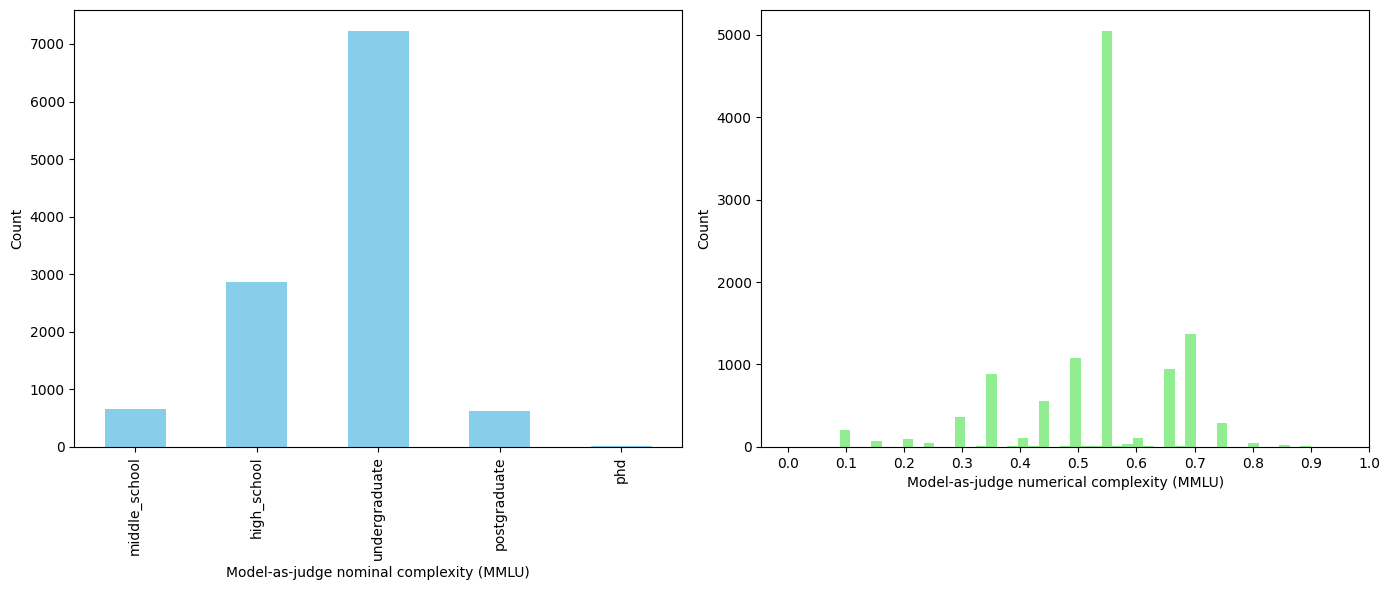

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot distribution by masj_nominal_complexity
mmlu_num_maj_df["masj_nominal_complexity"].value_counts().loc[
    ["middle_school", "high_school", "undergraduate", "postgraduate", "phd"]
].plot(kind="bar", ax=axes[0], color="skyblue")
# axes[0].set_title("Distribution by masj_nominal_complexity")
axes[0].set_xlabel("Model-as-judge nominal complexity (MMLU)")
axes[0].set_ylabel("Count")

# Plot distribution by masj_num_complexity as a histogram
mmlu_num_maj_df["masj_num_complexity"].plot(kind="hist", bins=50, ax=axes[1], color="lightgreen")
axes[1].set_xticks([x * 0.1 for x in range(0, 11)])
# axes[1].set_title("Distribution by masj_num_complexity")
axes[1].set_xlabel("Model-as-judge numerical complexity (MMLU)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [3]:
print(
    mmlu_num_maj_df.value_counts("masj_nominal_complexity").loc[
        ["middle_school", "high_school", "undergraduate", "postgraduate", "phd"]
    ]
)

# Generate 5 groups for "masj_num_complexity" from 0 to 1
masj_num_complexity_group = pd.cut(
    mmlu_num_maj_df["masj_num_complexity"],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
    labels=["middle_school", "high_school", "undergraduate", "postgraduate", "phd"],
)
# Count values in each group
group_counts = masj_num_complexity_group.value_counts().sort_index()
print(group_counts)


masj_nominal_complexity
middle_school     655
high_school      2871
undergraduate    7229
postgraduate      627
phd                11
Name: count, dtype: int64
masj_num_complexity
middle_school     382
high_school      1417
undergraduate    6868
postgraduate     2687
phd                35
Name: count, dtype: int64


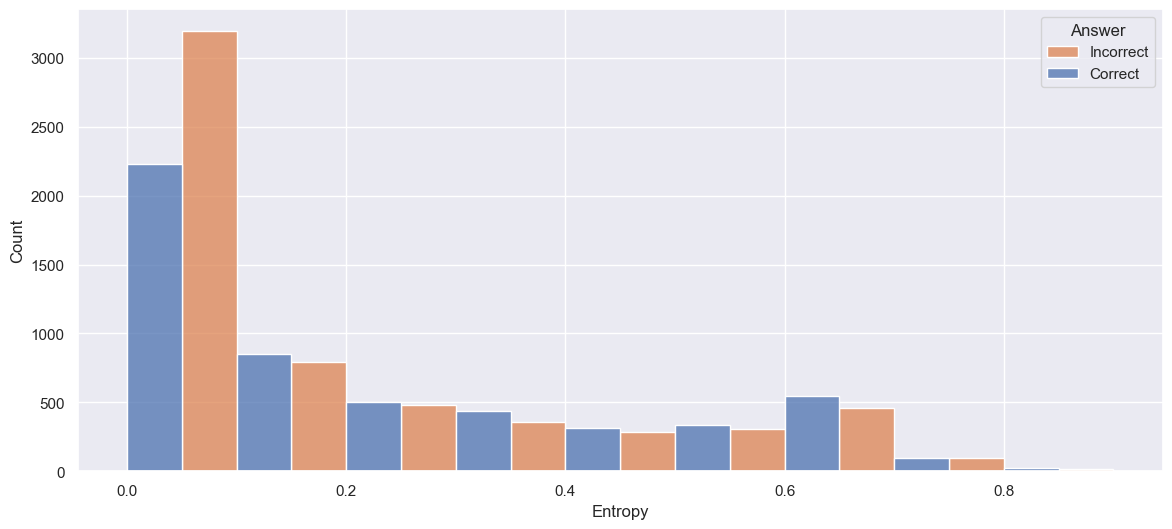

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="entropy_value_phi3",
    bins=[x * 0.1 for x in range(0, 10)],
    hue="entropy_ans_correct_phi3",
    hue_order=[False, True],
    multiple="dodge",
)
ax.set_xlabel("Entropy")
ax.set_ylabel("Count")
plt.legend(labels=["Incorrect", "Correct"], title="Answer")

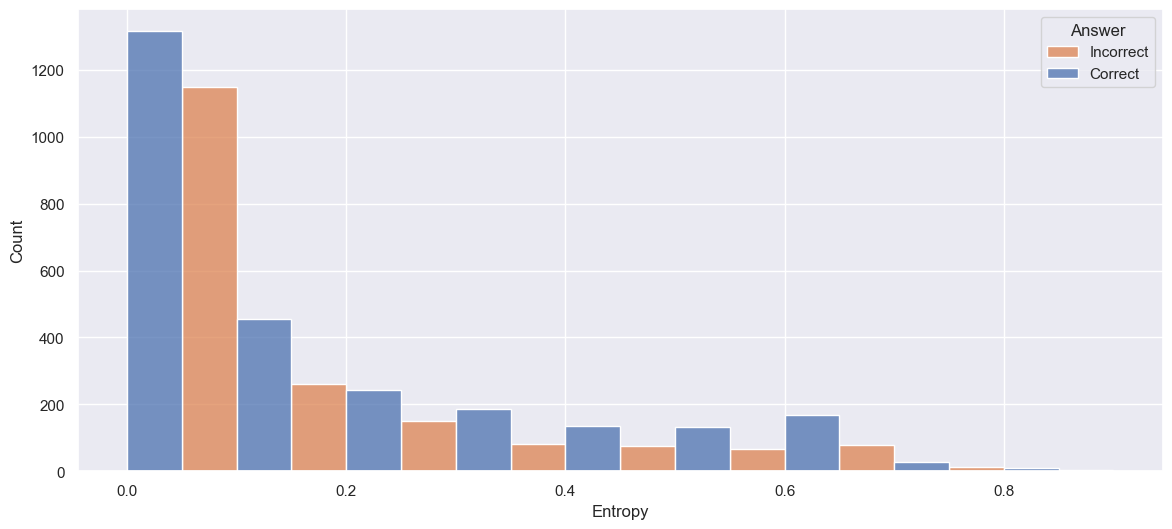

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df.loc[mmlu_num_maj_df["category"].isin(STEM), :],
    x="entropy_value_phi3",
    bins=[x * 0.1 for x in range(0, 10)],
    hue="entropy_ans_correct_phi3",
    hue_order=[False, True],
    multiple="dodge",
)
ax.set_xlabel("Entropy")
ax.set_ylabel("Count")
plt.legend(labels=["Incorrect", "Correct"], title="Answer")

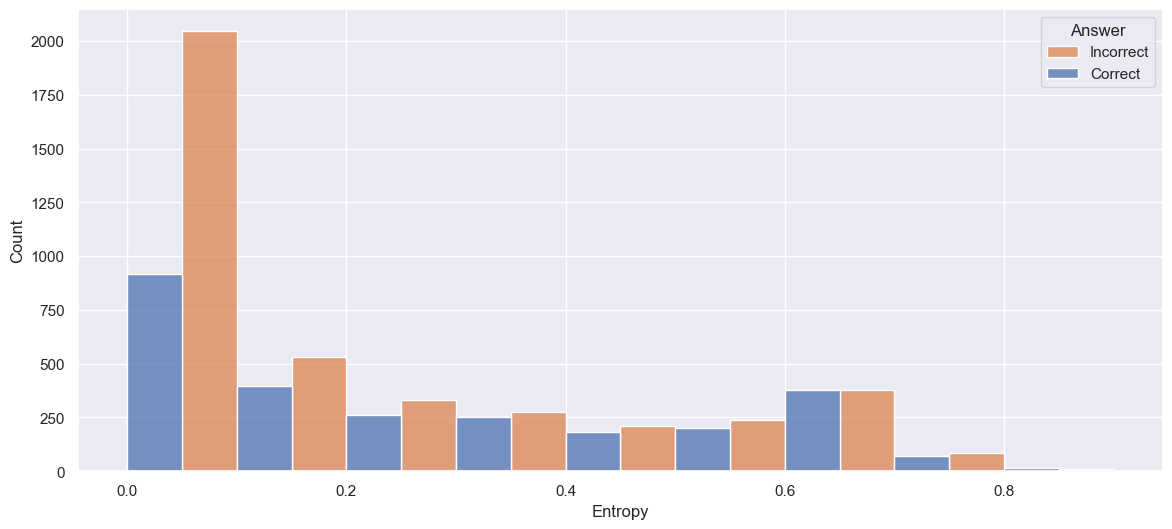

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df.loc[~mmlu_num_maj_df["category"].isin(STEM), :],
    x="entropy_value_phi3",
    bins=[x * 0.1 for x in range(0, 10)],
    hue="entropy_ans_correct_phi3",
    hue_order=[False, True],
    multiple="dodge",
)
ax.set_xlabel("Entropy")
ax.set_ylabel("Count")
plt.legend(labels=["Incorrect", "Correct"], title="Answer")

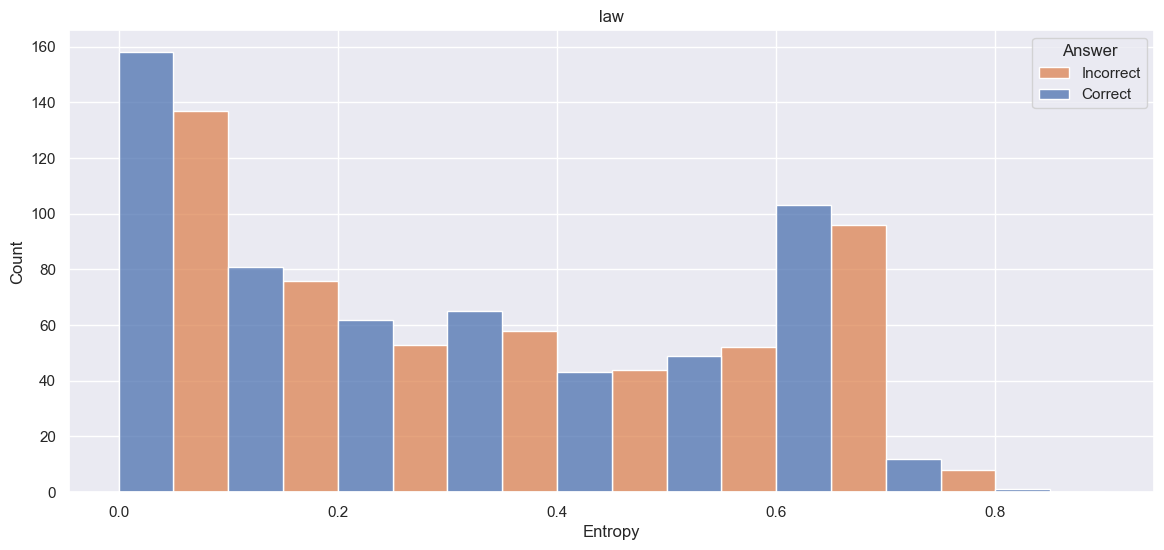

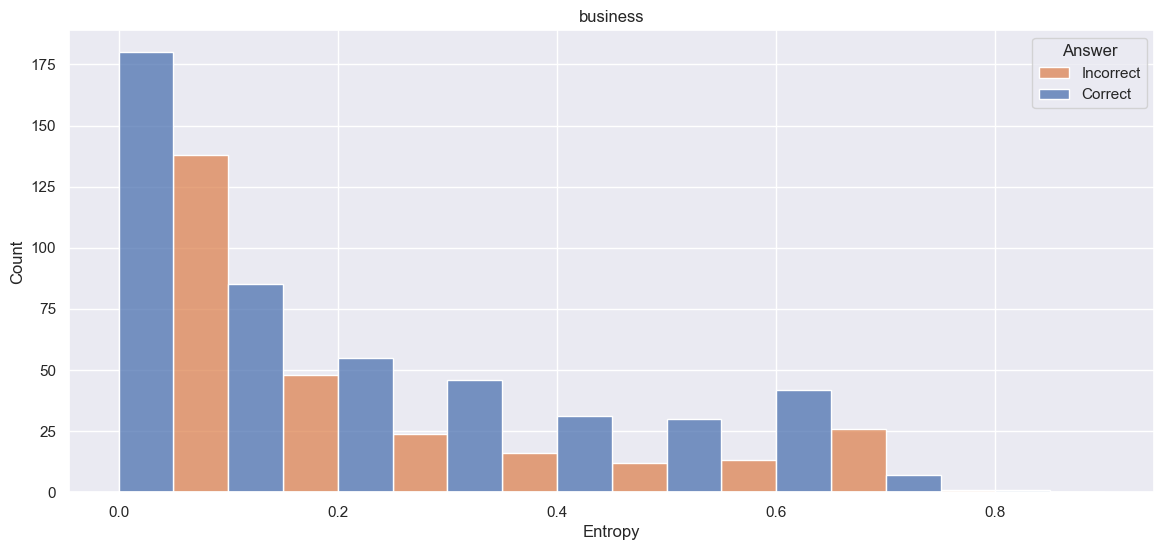

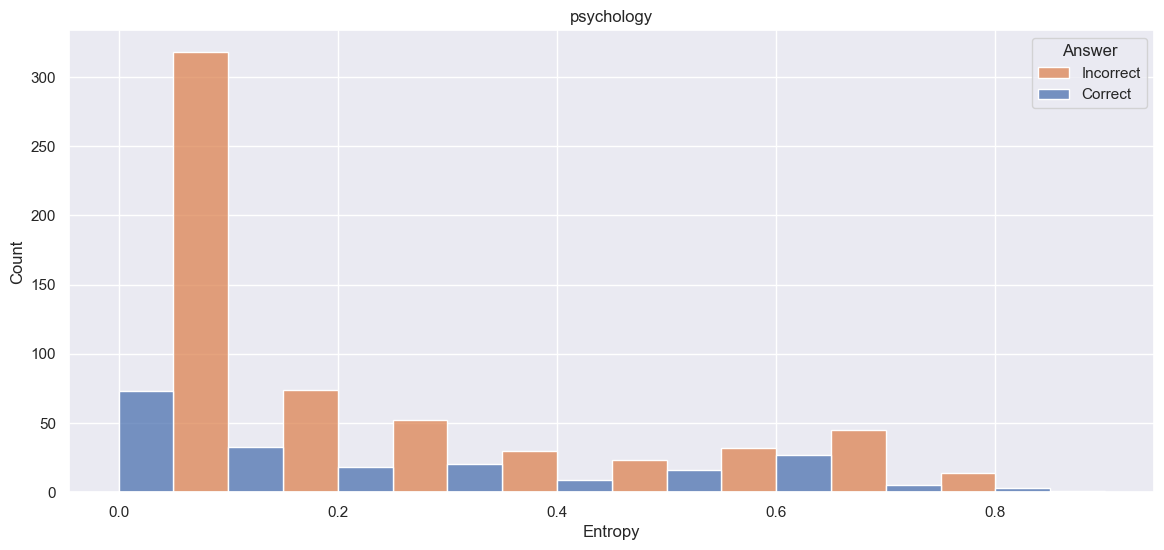

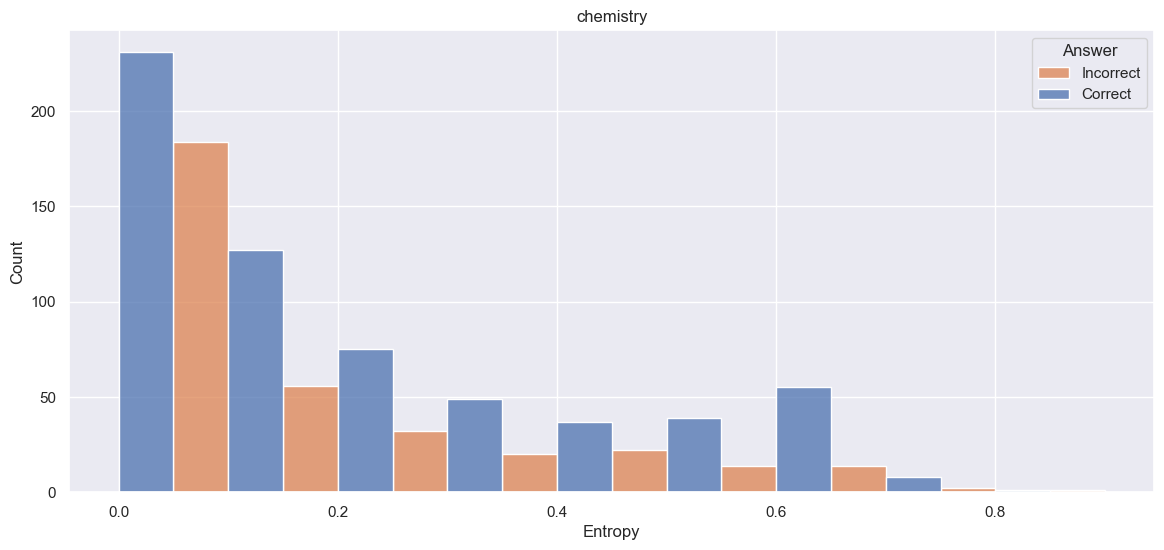

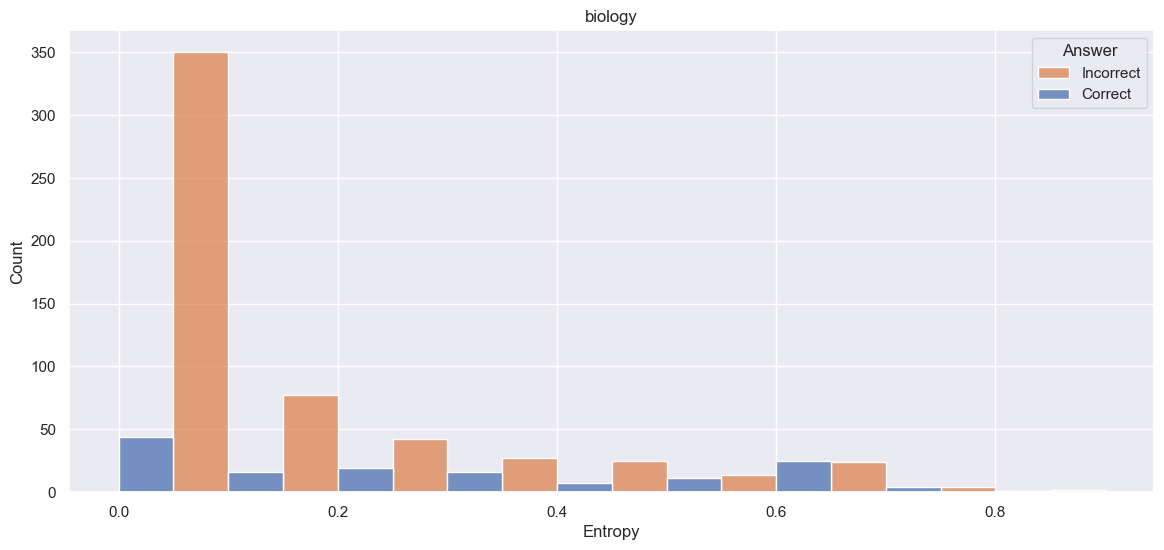

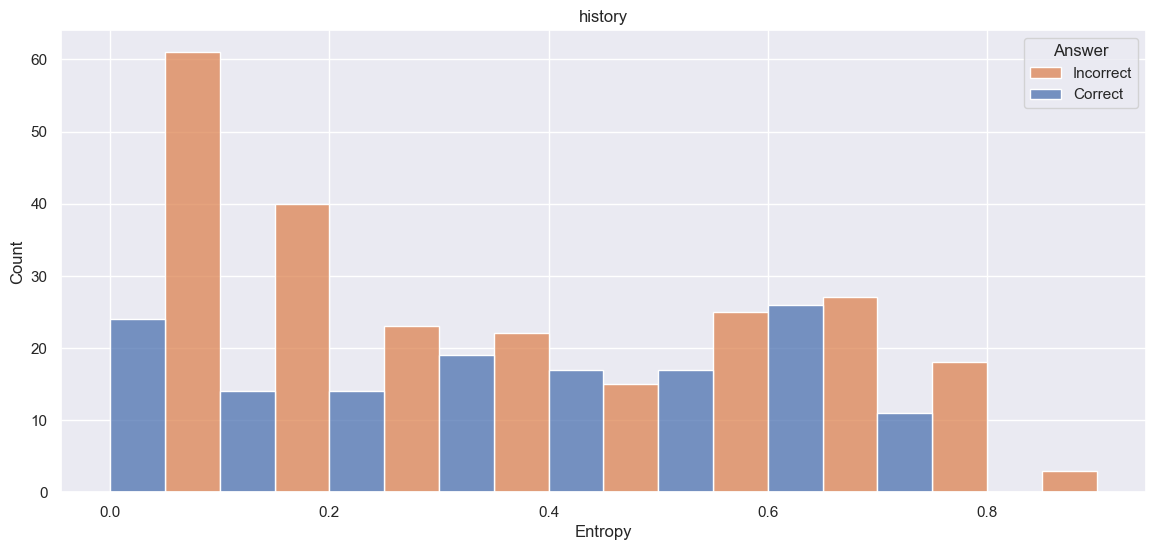

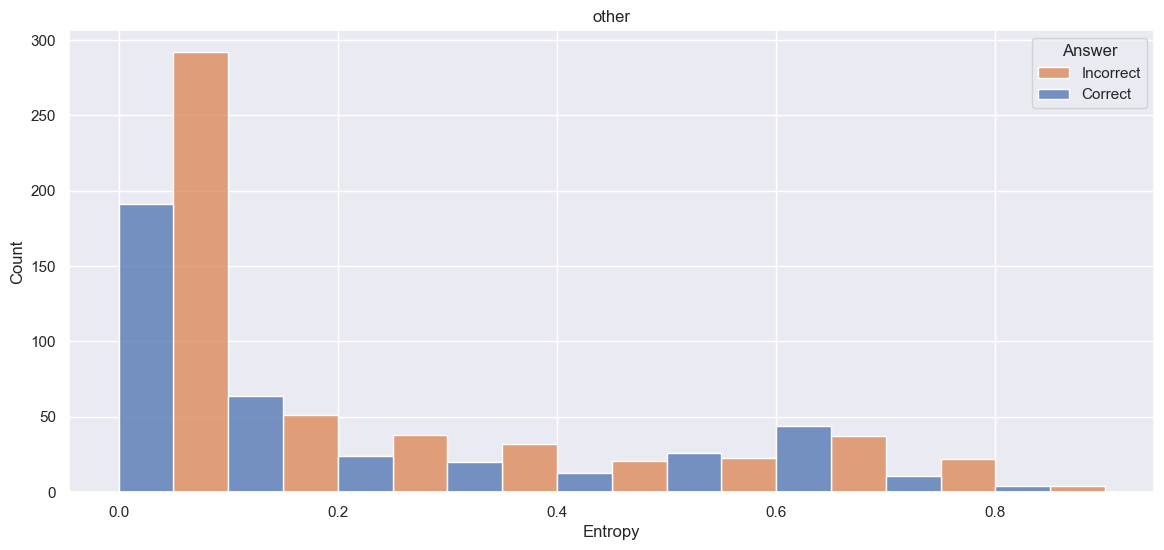

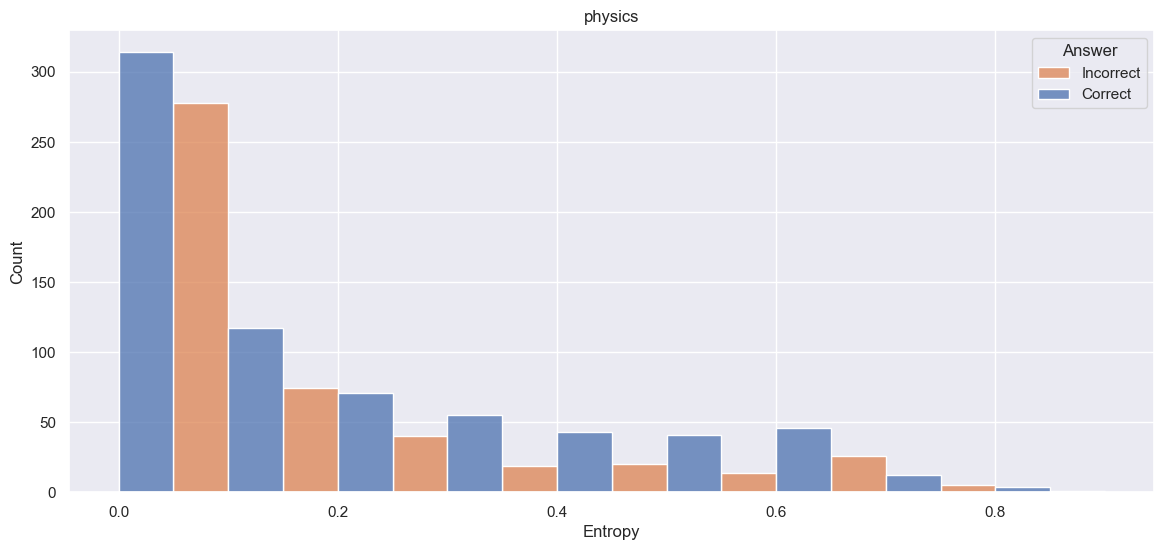

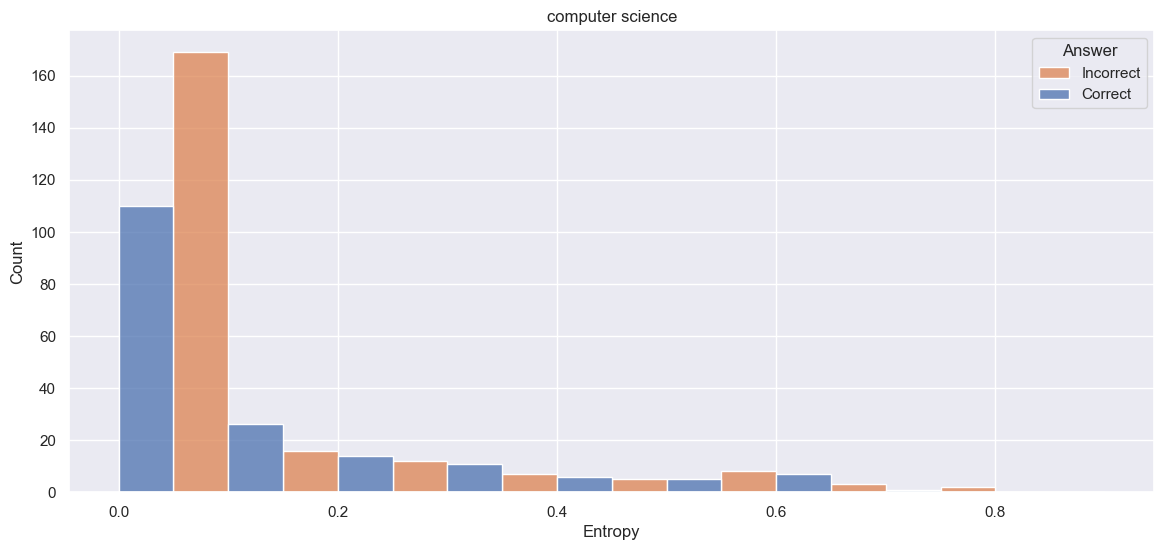

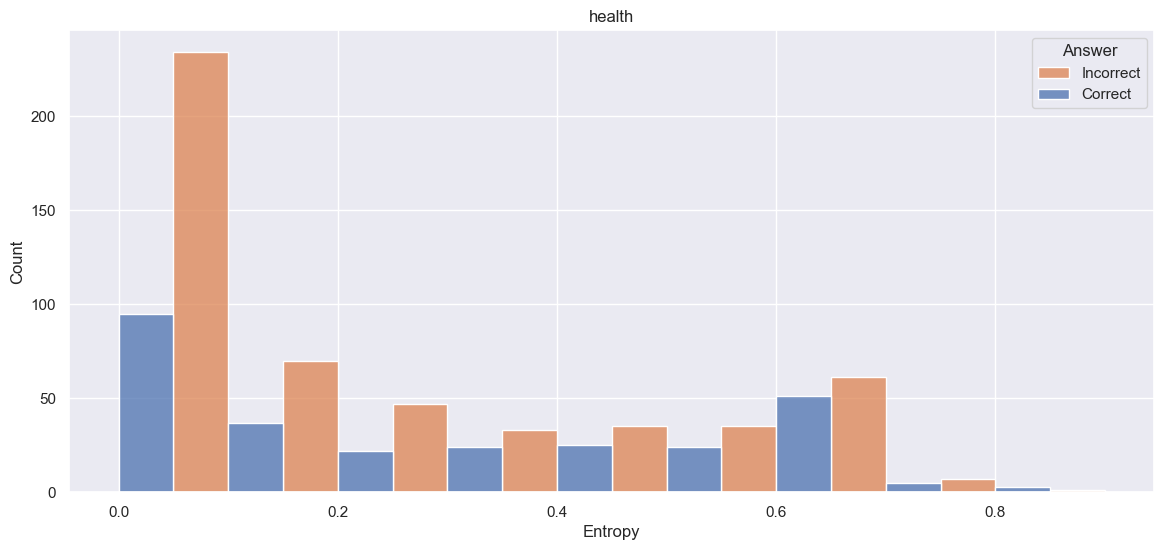

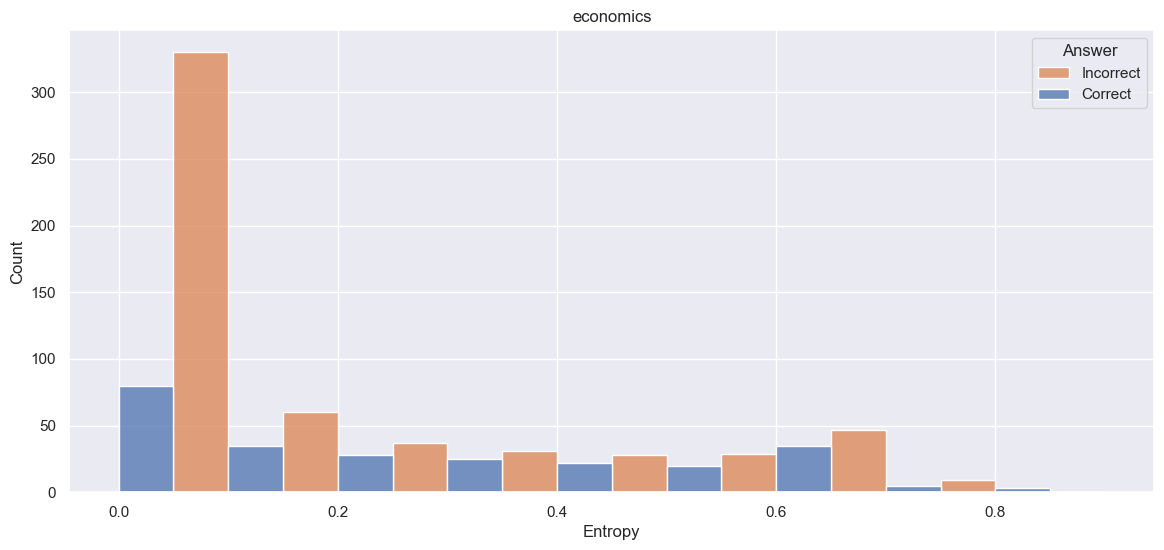

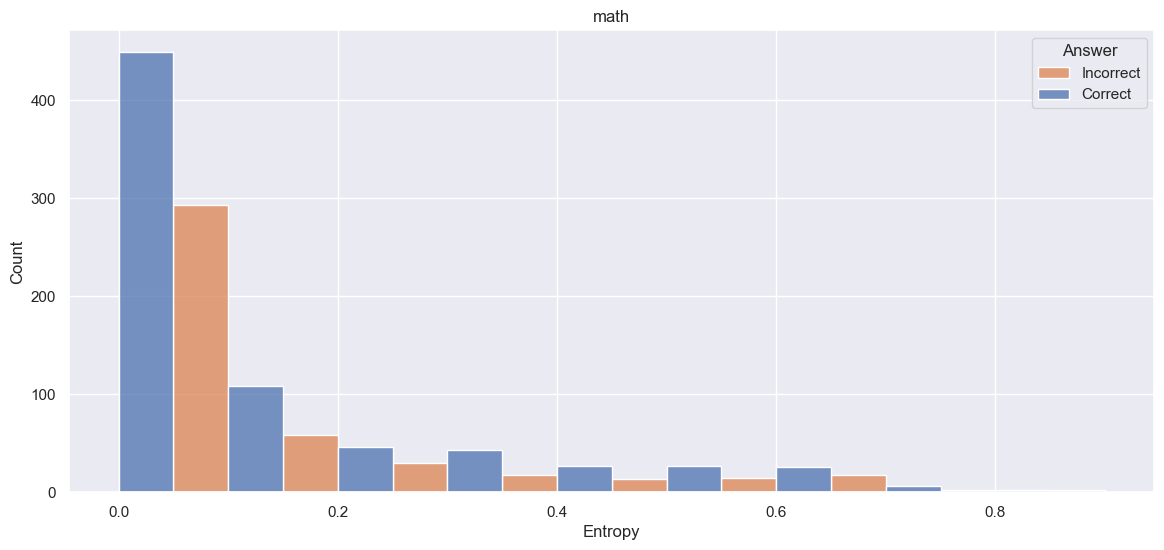

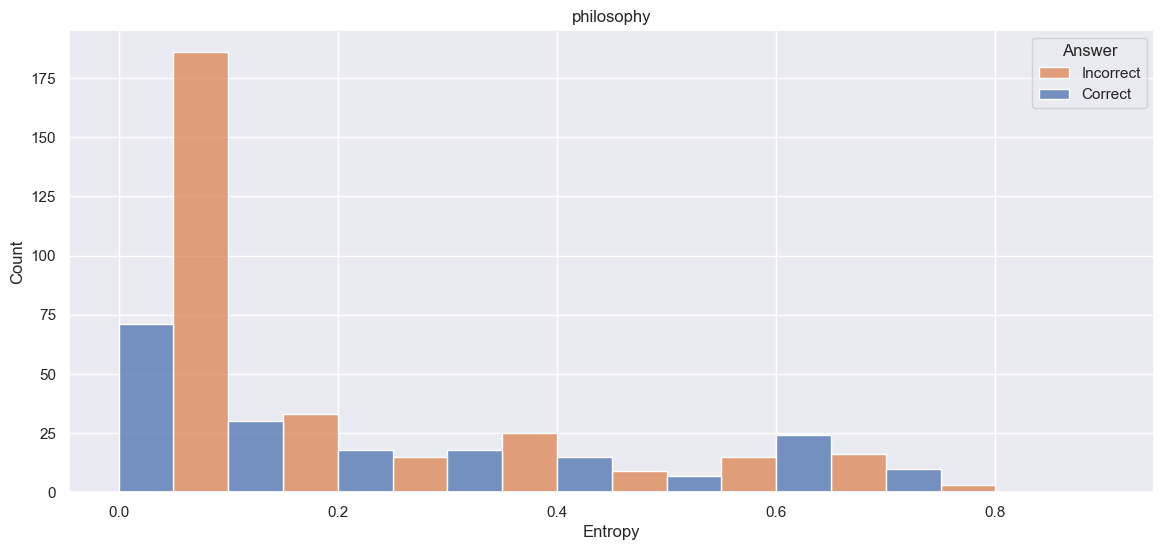

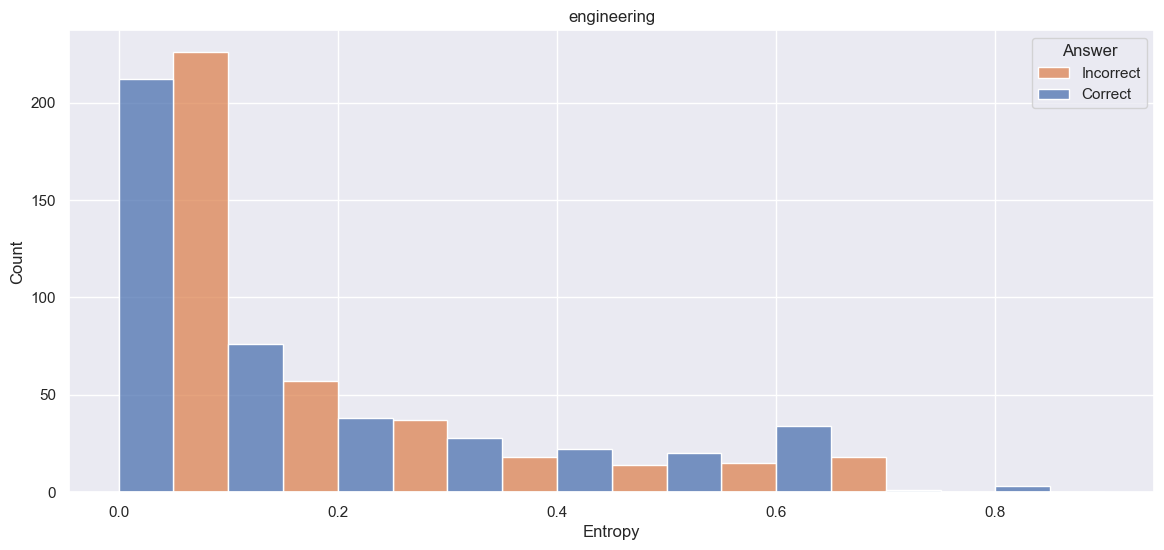

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


for cat in mmlu_num_maj_df["category"].unique():
    plt.figure(figsize=(14, 6))
    ax = sns.histplot(
        mmlu_num_maj_df.loc[mmlu_num_maj_df["category"].isin([cat]), :],
        x="entropy_value_phi3",
        bins=[x * 0.1 for x in range(0, 10)],
        hue="entropy_ans_correct_phi3",
        hue_order=[False, True],
        multiple="dodge",
    )
    ax.set_xlabel("Entropy")
    ax.set_ylabel("Count")
    ax.set_title(cat)
    plt.legend(labels=["Incorrect", "Correct"], title="Answer")

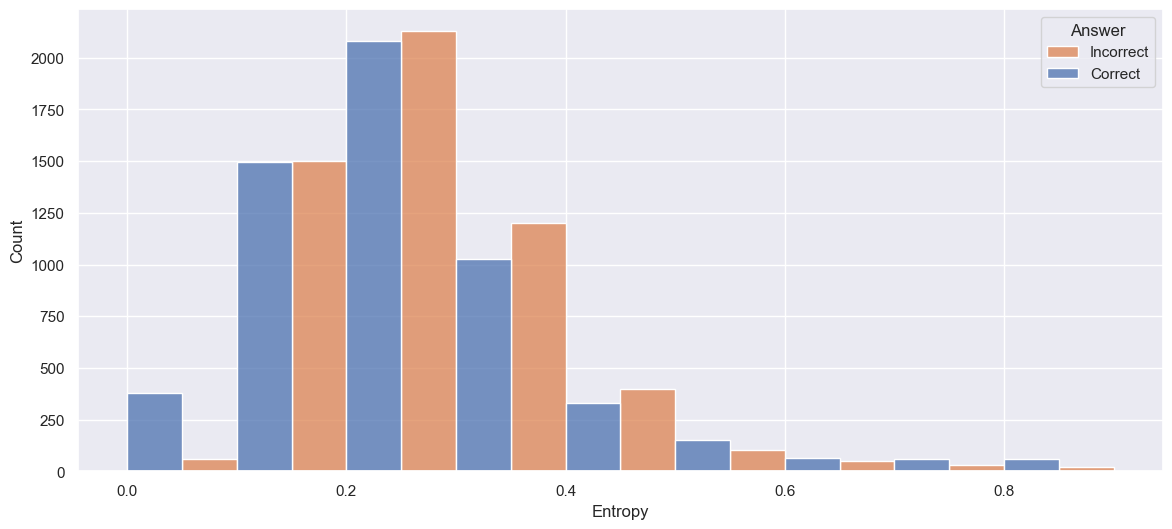

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="entropy_value_mistral",
    bins=[x * 0.1 for x in range(0, 10)],
    hue="entropy_ans_correct_mistral",
    hue_order=[False, True],
    multiple="dodge",
)
ax.set_xlabel("Entropy")
ax.set_ylabel("Count")
plt.legend(labels=["Incorrect", "Correct"], title="Answer")

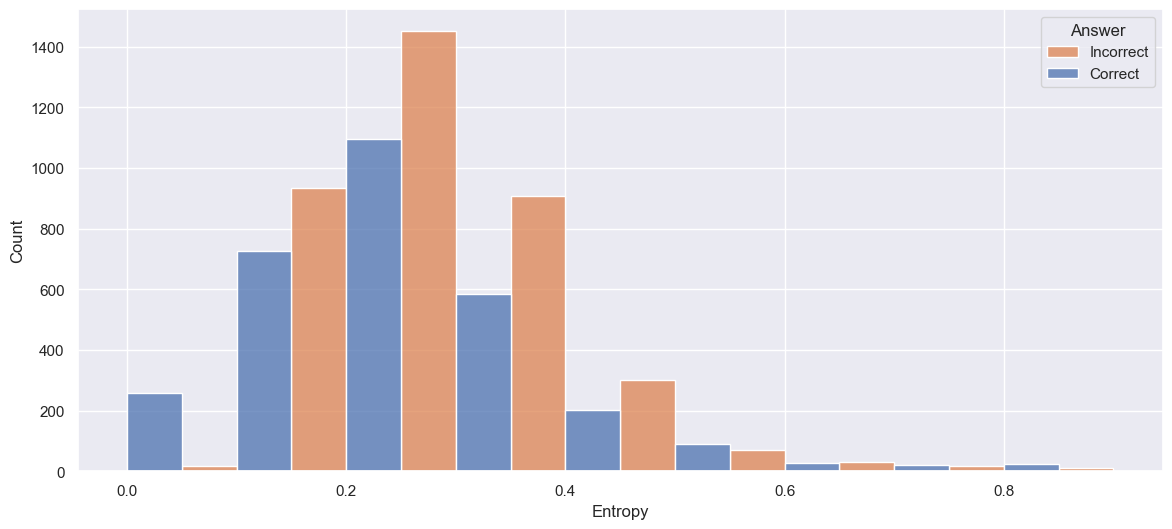

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df.loc[~mmlu_num_maj_df["category"].isin(STEM), :],
    x="entropy_value_mistral",
    bins=[x * 0.1 for x in range(0, 10)],
    hue="entropy_ans_correct_mistral",
    hue_order=[False, True],
    multiple="dodge",
)
ax.set_xlabel("Entropy")
ax.set_ylabel("Count")
plt.legend(labels=["Incorrect", "Correct"], title="Answer")

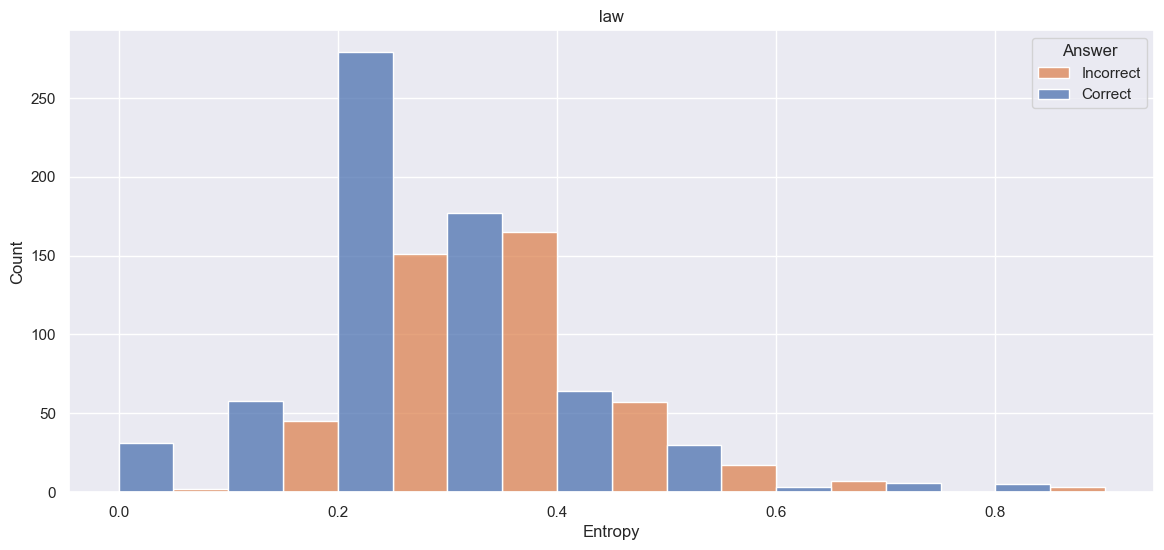

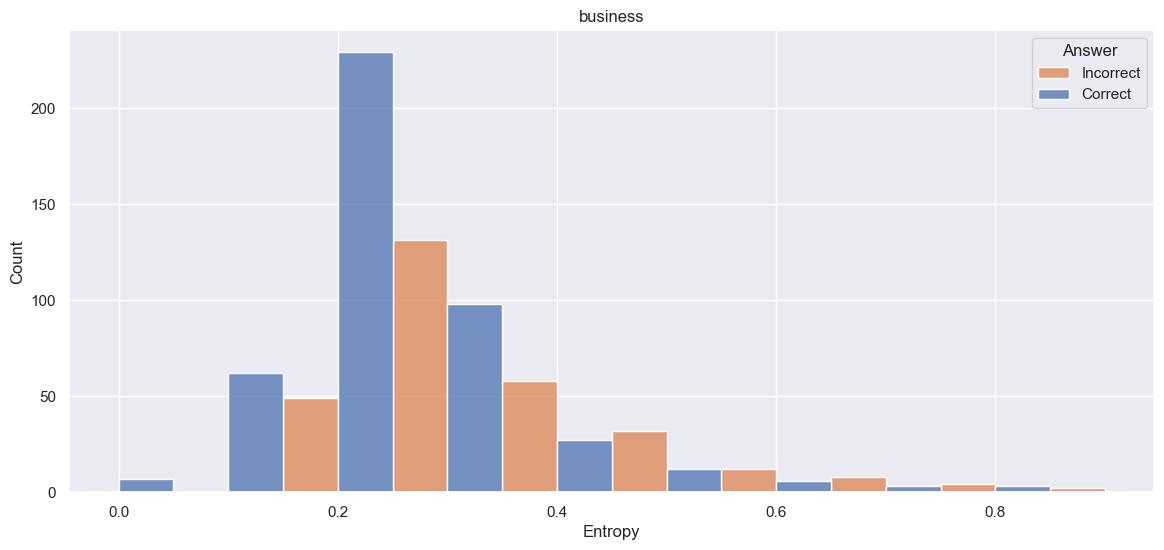

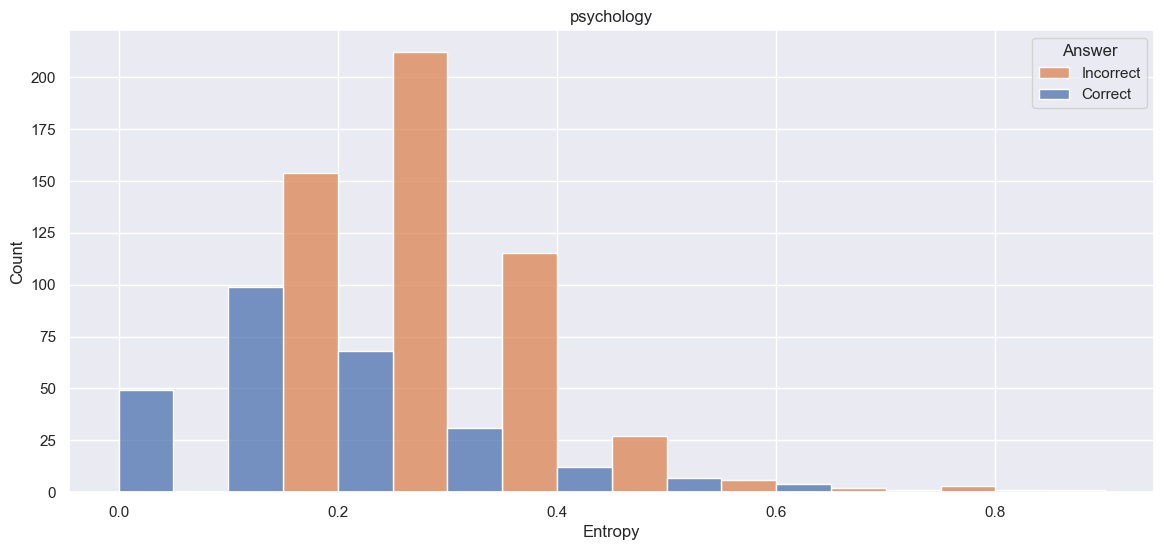

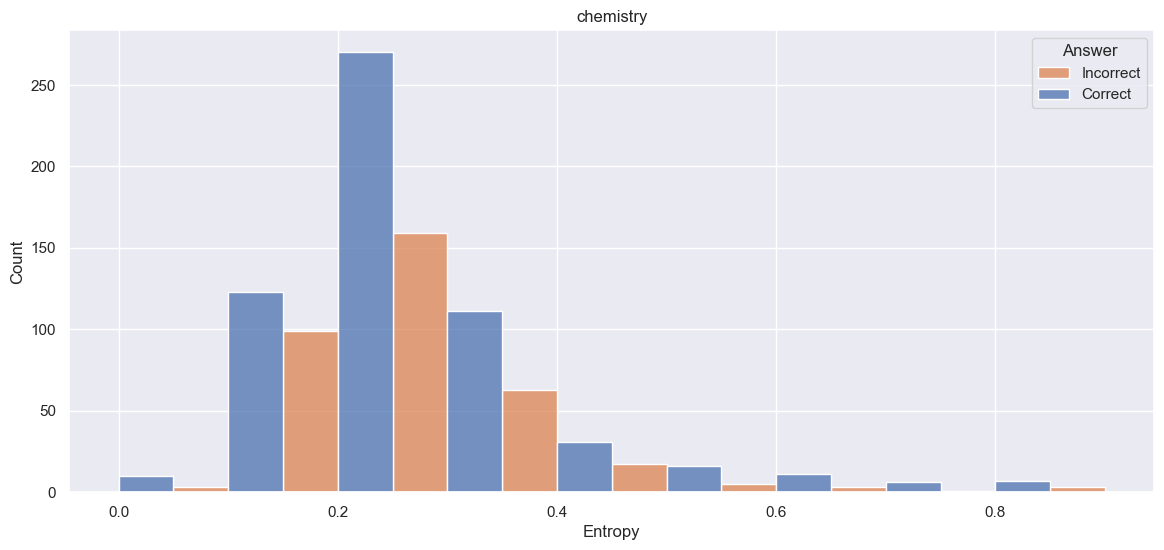

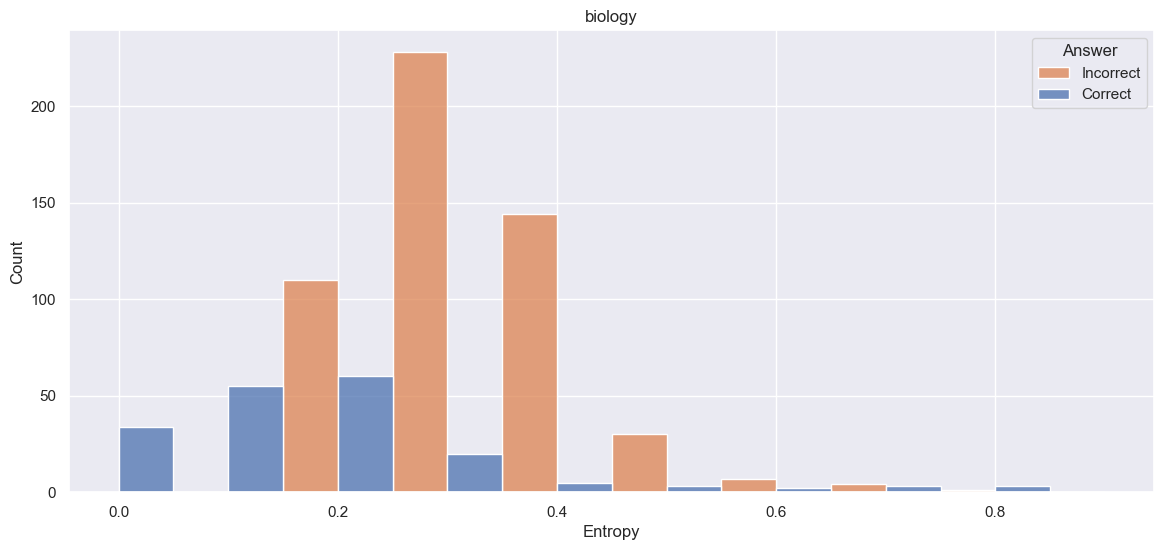

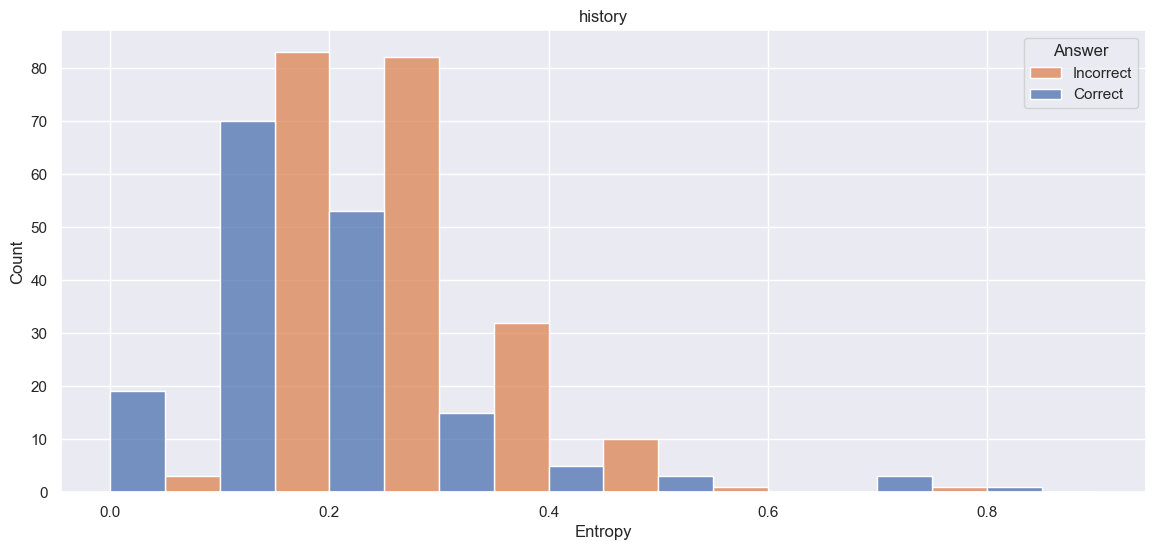

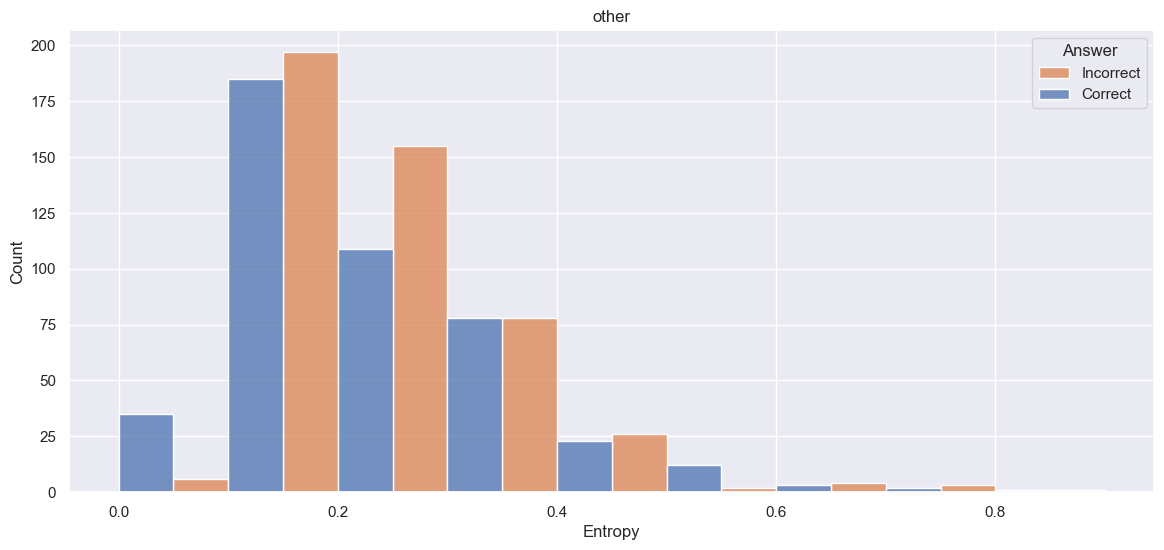

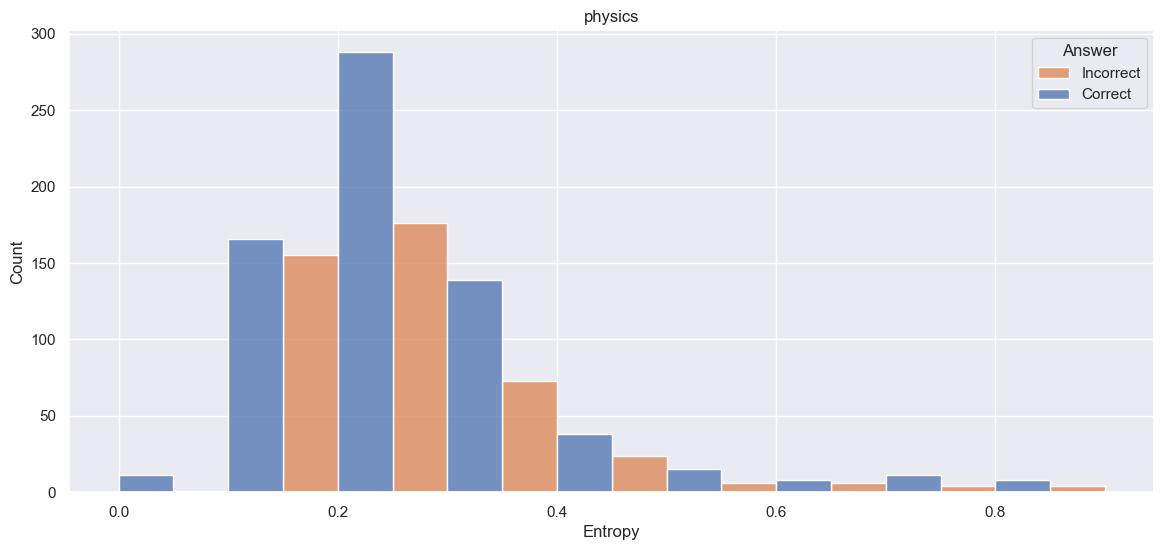

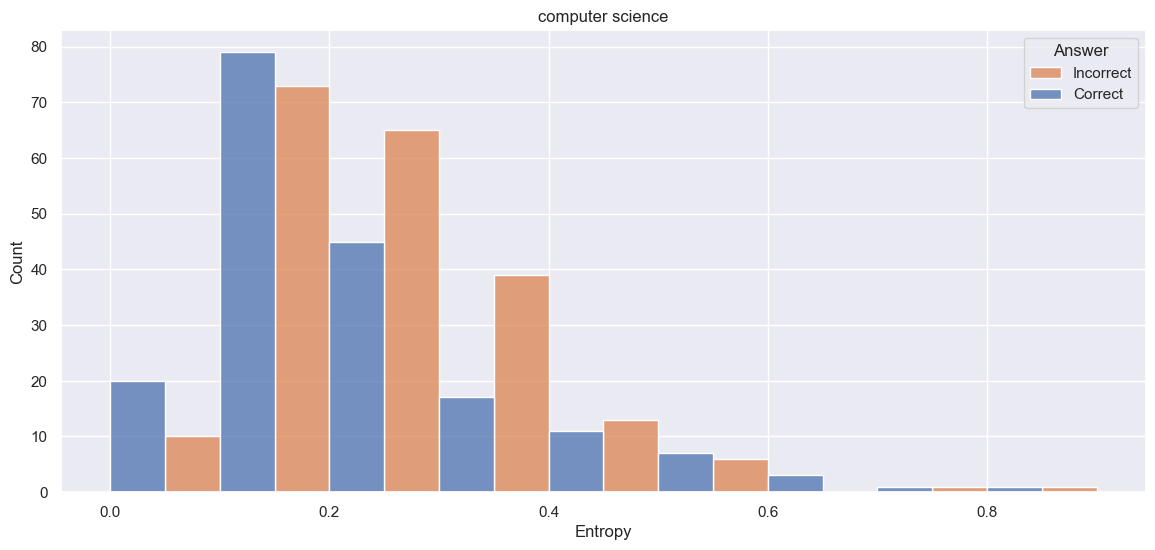

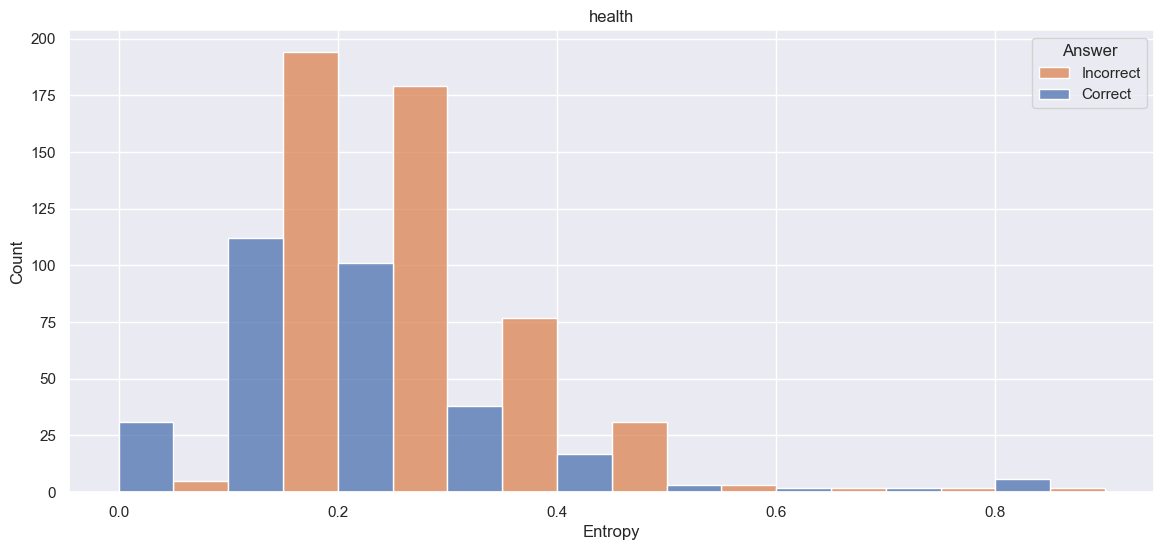

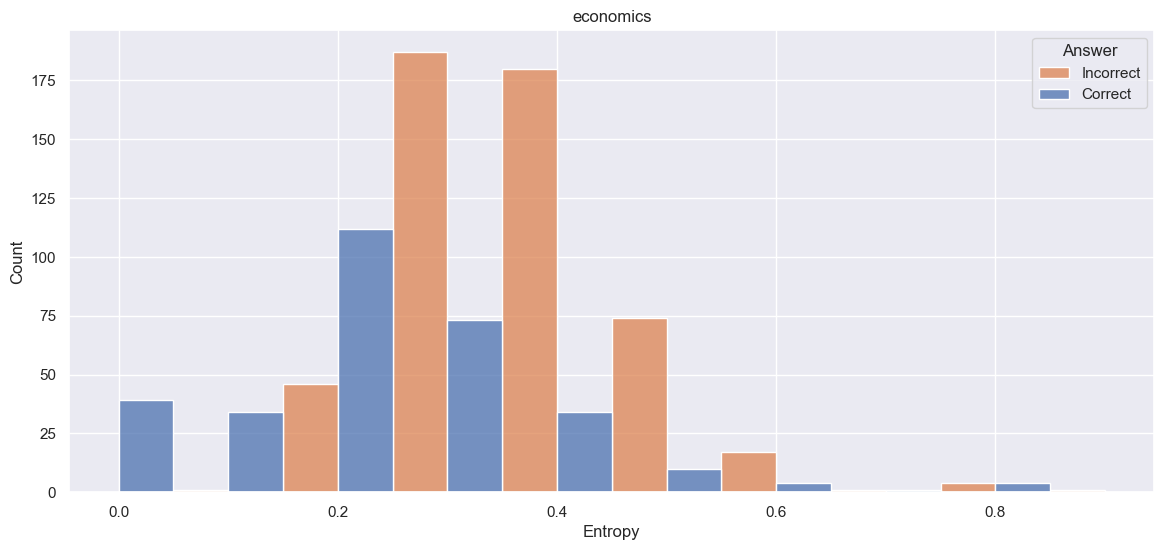

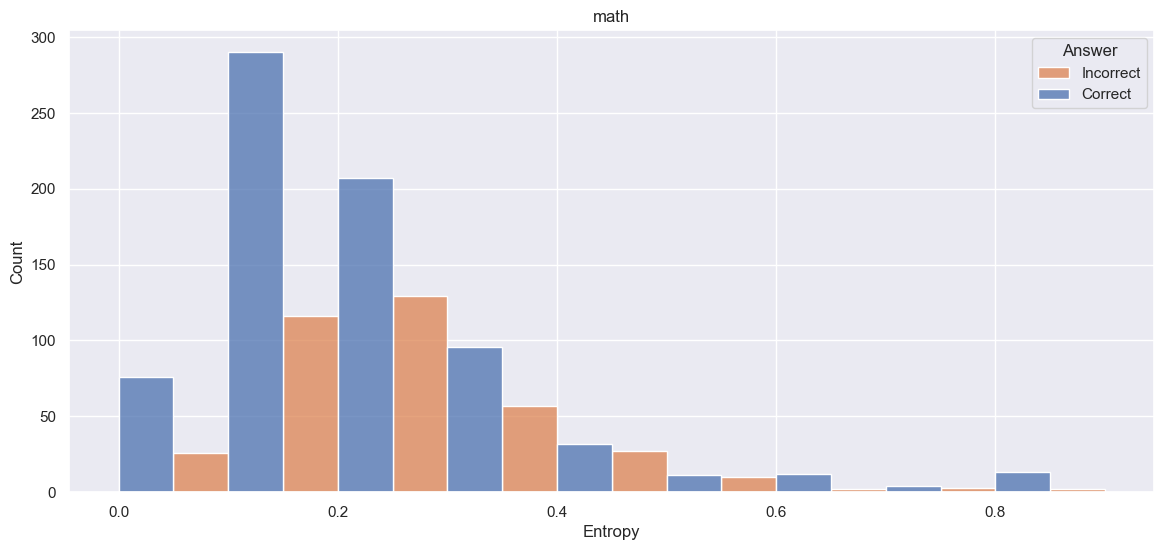

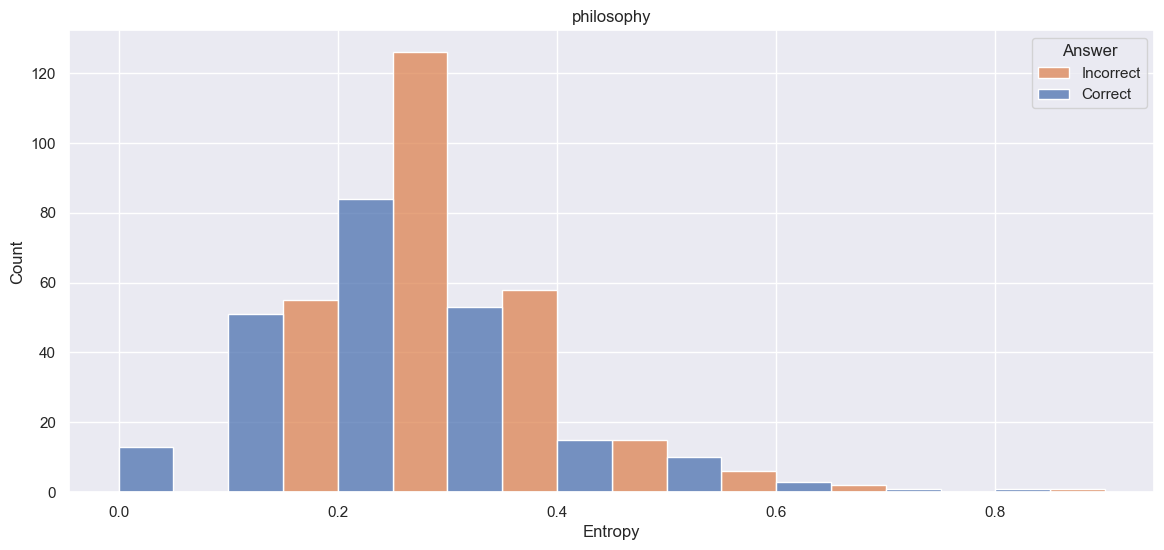

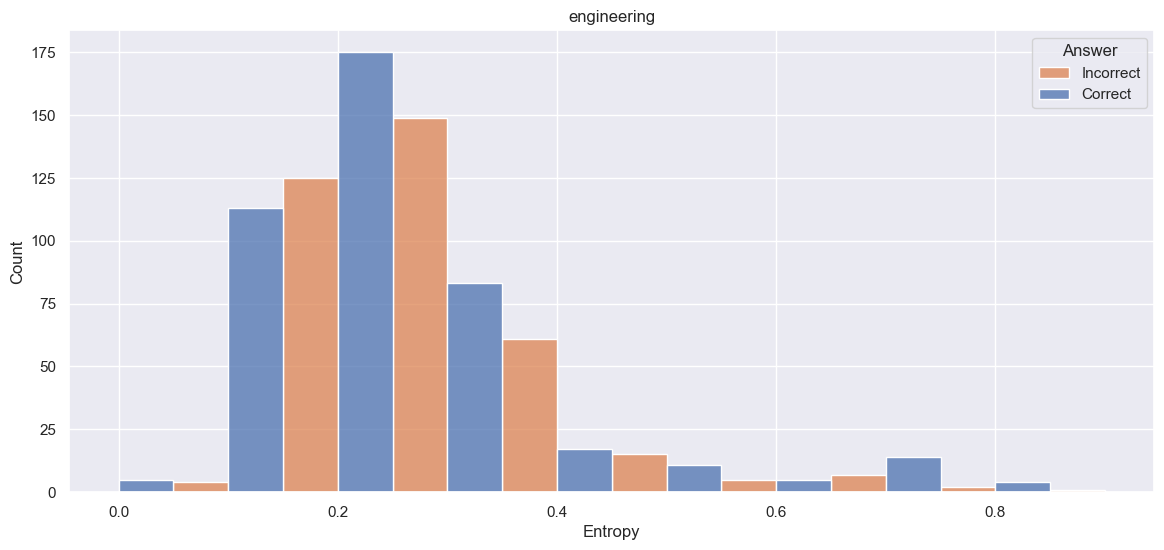

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


for cat in mmlu_num_maj_df["category"].unique():
    plt.figure(figsize=(14, 6))
    ax = sns.histplot(
        mmlu_num_maj_df.loc[mmlu_num_maj_df["category"].isin([cat]), :],
        x="entropy_value_mistral",
        bins=[x * 0.1 for x in range(0, 10)],
        hue="entropy_ans_correct_mistral",
        hue_order=[False, True],
        multiple="dodge",
    )
    ax.set_xlabel("Entropy")
    ax.set_ylabel("Count")
    ax.set_title(cat)
    plt.legend(labels=["Incorrect", "Correct"], title="Answer")

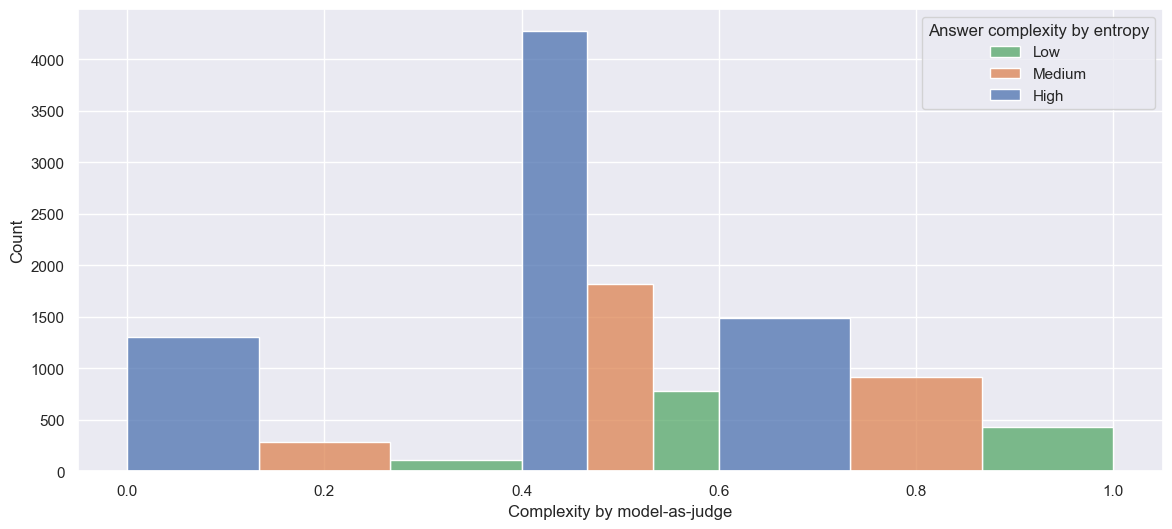

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

medium_phi4_entropy = mmlu_num_maj_df[
    (mmlu_num_maj_df["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df[(mmlu_num_maj_df["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
# g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy")
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")

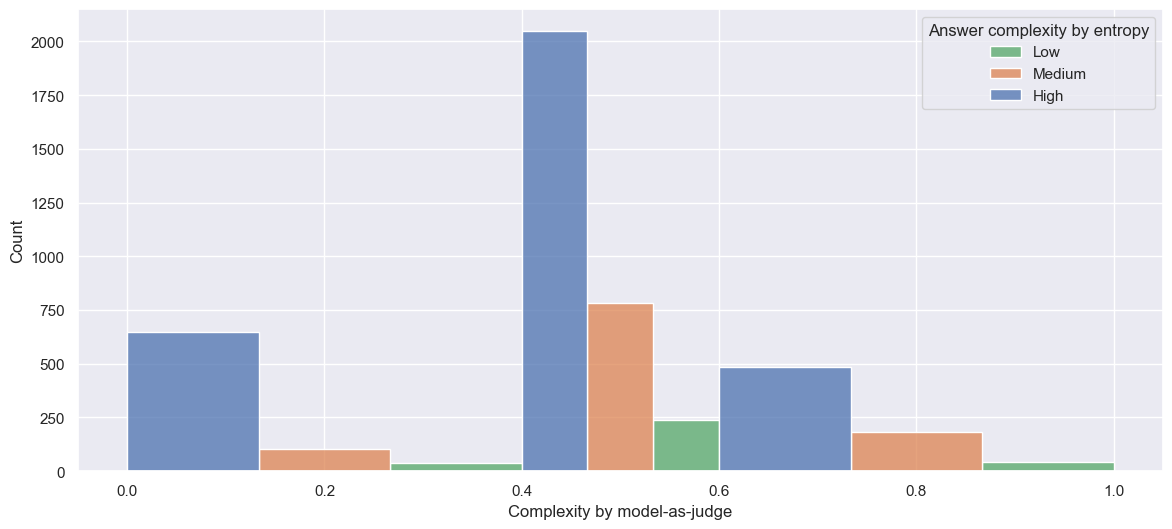

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

medium_phi4_entropy = mmlu_num_maj_df[
    (mmlu_num_maj_df["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df[(mmlu_num_maj_df["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df.loc[mmlu_num_maj_df["category"].isin(STEM), :],
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
# g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy")
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")

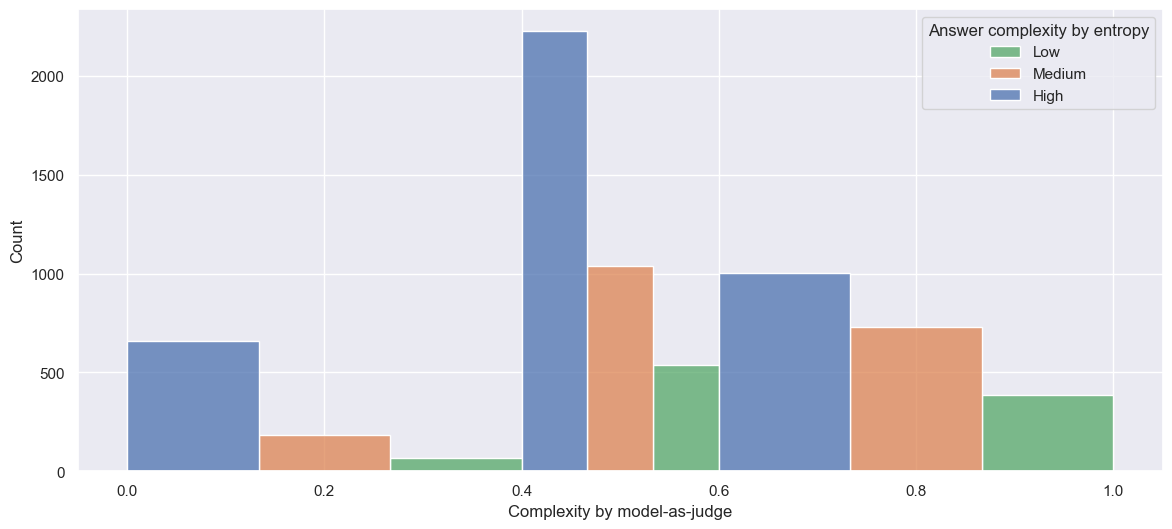

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

medium_phi4_entropy = mmlu_num_maj_df[
    (mmlu_num_maj_df["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df[(mmlu_num_maj_df["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df.loc[~mmlu_num_maj_df["category"].isin(STEM), :],
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
# g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy")
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")

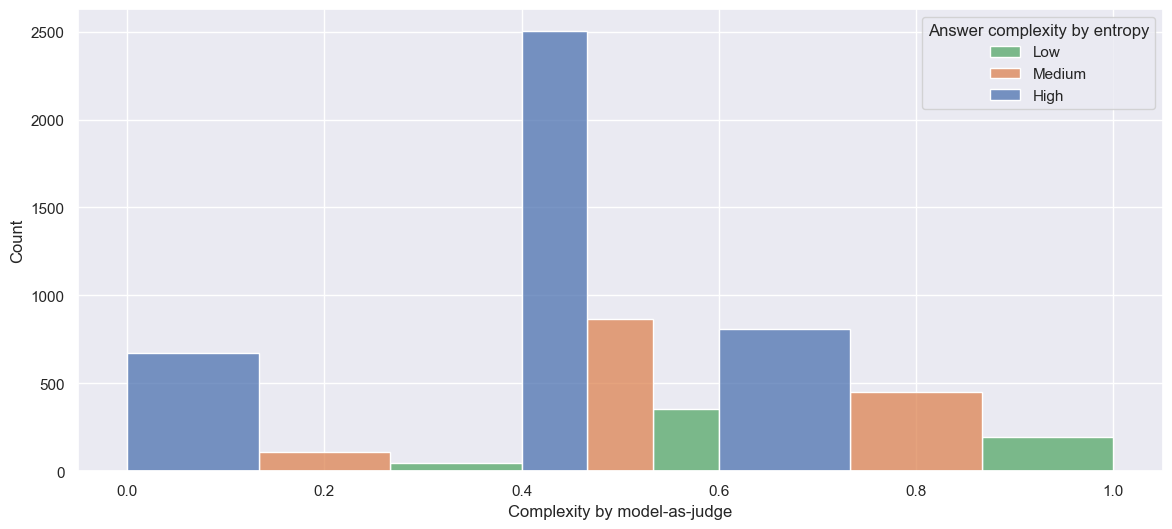

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

mmlu_num_maj_df_true_only = mmlu_num_maj_df[mmlu_num_maj_df["entropy_ans_correct_phi3"] == True].copy(deep=True)

medium_phi4_entropy = mmlu_num_maj_df_true_only[
    (mmlu_num_maj_df_true_only["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df_true_only["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df_true_only[(mmlu_num_maj_df_true_only["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df_true_only["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df_true_only.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df_true_only.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df_true_only,
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")
# g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy for correct answers only")

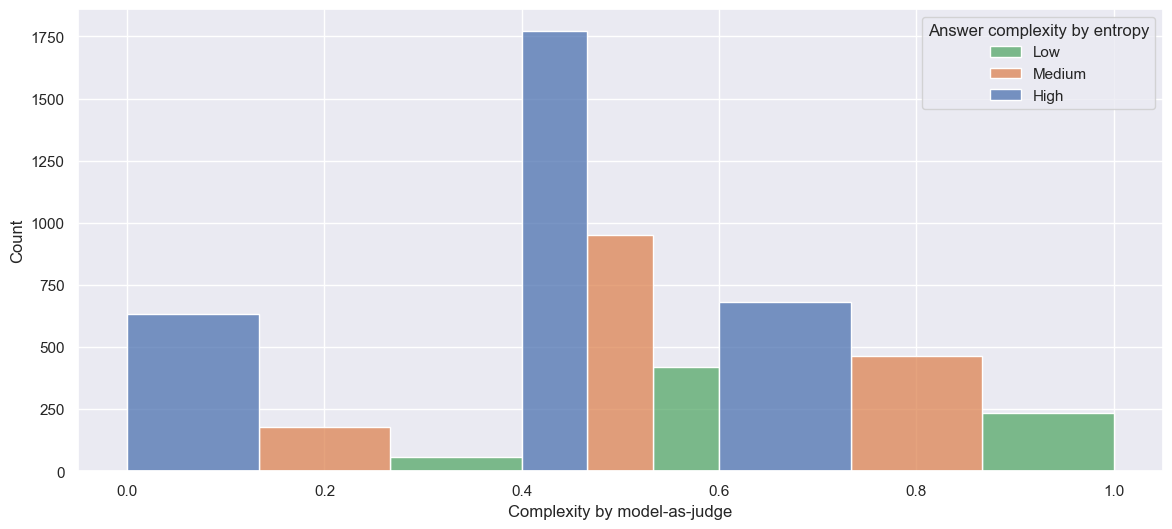

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

mmlu_num_maj_df_false_only = mmlu_num_maj_df[mmlu_num_maj_df["entropy_ans_correct_phi3"] == False].copy(deep=True)

medium_phi4_entropy = mmlu_num_maj_df_false_only[
    (mmlu_num_maj_df_false_only["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df_false_only["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df_false_only[(mmlu_num_maj_df_false_only["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df_false_only["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df_false_only.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df_false_only.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df_false_only,
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")

Text(0, 0.5, 'Count')

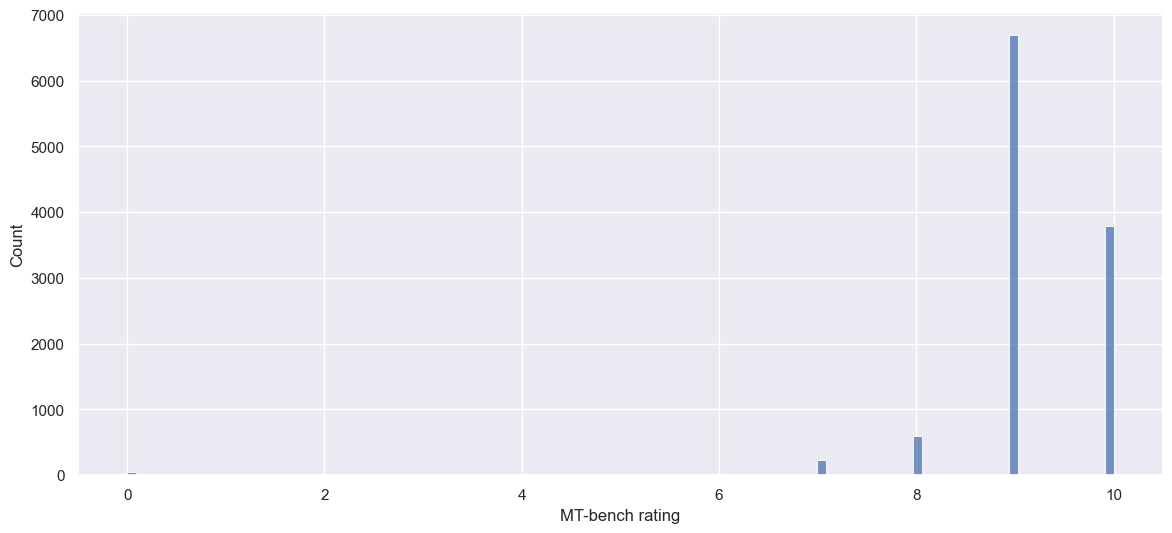

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="masj_num_rating",
)
ax.set_xlabel("MT-bench rating")
ax.set_ylabel("Count")
# g.title.set_text("Distribution of model-as-judge complexity ratings")

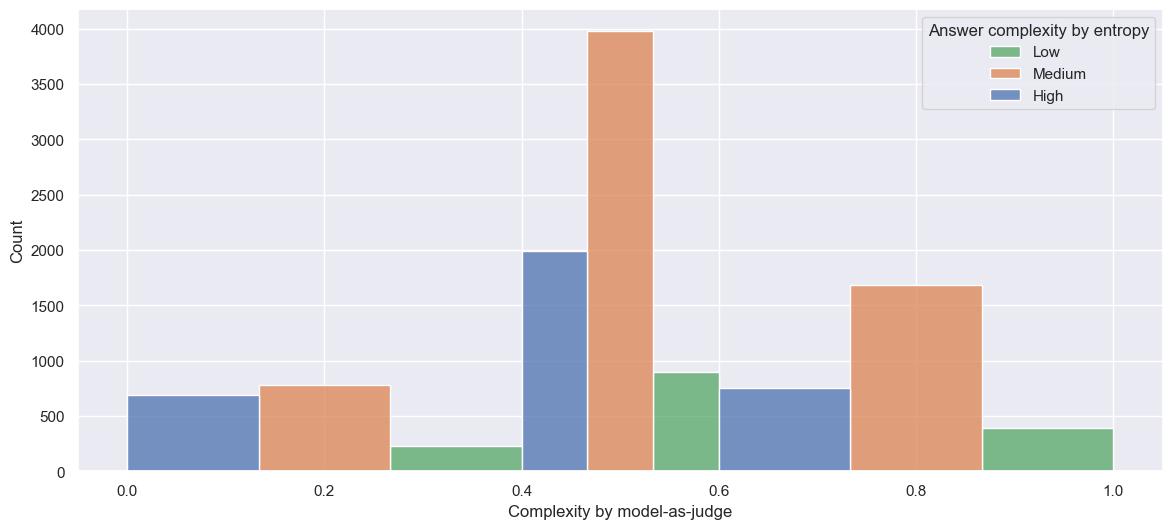

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

medium_phi4_entropy = mmlu_num_maj_df[
    (mmlu_num_maj_df["entropy_value_mistral"] > 0.2) & (mmlu_num_maj_df["entropy_value_mistral"] < 0.4)
]
high_phi4_entropy = mmlu_num_maj_df[(mmlu_num_maj_df["entropy_value_mistral"] >= 0.4)]


mmlu_num_maj_df["catgorized_entropy_mistral"] = "low"

mmlu_num_maj_df.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_mistral",
] = "medium"
mmlu_num_maj_df.loc[high_phi4_entropy.index, "catgorized_entropy_mistral"] = "high"

plt.figure(figsize=(14, 6))
ax = sns.histplot(
    mmlu_num_maj_df,
    x="masj_num_complexity",
    hue="catgorized_entropy_mistral",
    hue_order=["low", "medium", "high"],
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
# g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy")
ax.set_xlabel("Complexity by model-as-judge")
ax.set_ylabel("Count")
plt.legend(labels=["Low", "Medium", "High"], title="Answer complexity by entropy")